In [2]:
%autosave 10


Autosaving every 10 seconds


**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('C:/Users/HP/Desktop/Datascience/Data_Exploration_and_Cleaning/cleaned_data.csv')
X_train , X_test, y_train, y_test = train_test_split(df['LIMIT_BAL'].values.reshape(-1,1), df['default payment next month'].values, test_size = 0.2, random_state = 24)

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [35]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.C = 0.1
training=lr.fit(X_train ,y_train)

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [38]:
predict=training.predict_proba(X_test)
pros_pre=predict[:,1]

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [39]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,threshold=roc_curve(y_test,pros_pre)
roc_auc_score(y_test,pros_pre)

0.6201990844642832

_________________________________________________________________________
**Now, plot the ROC curve.**


AttributeError: module 'matplotlib.pyplot' has no attribute 'titlte'

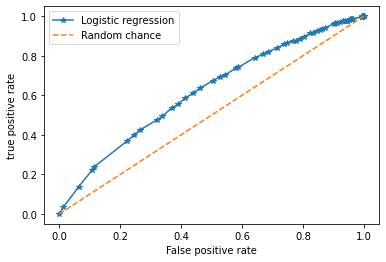

In [41]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
plt.plot(fpr,tpr,'*-')
plt.plot([0,1],[0,1],'--')
plt.legend(['Logistic regression','Random chance'])
plt.xlabel('False positive rate')
plt.ylabel('true positive rate')
plt.titlte('ROC curve')
plt.show()


_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [43]:
from sklearn.metrics import precision_recall_curve
precision,recall,_=precision_recall_curve(y_test,pros_pre)

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


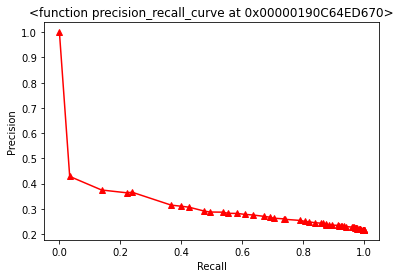

In [47]:
plt.plot(recall,precision,'r^-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(precision_recall_curve)
plt.show()

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [48]:
from sklearn.metrics import auc
auc_score=auc(recall,precision)
auc_score

0.31566964427378624

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [50]:
train_pred = training.predict_proba(X_train)
roc_auc_score(y_train, train_pred[:,1])

0.6182918113358344

    How is this different, conceptually and quantitatively, from your earlier calculation?
